# Área bajo la curva ROC

El área bajo la curva ROC es una métrica que nos permite establecer qué tan bien funciona un algoritmo de clasificación binaria de machine learning.

A continuación, agrego texto aportado por `ChatGPT`:

# Análisis de la Curva ROC y AUC en un Modelo de Clasificación Binaria

## ¿Qué es la curva ROC?

La **curva ROC** (Receiver Operating Characteristic) es una representación gráfica del rendimiento de un modelo de clasificación binaria. Muestra la relación entre dos métricas clave:

- **Tasa de Verdaderos Positivos (TPR)**: También conocida como sensibilidad o recall, es la proporción de positivos verdaderos que el modelo ha clasificado correctamente.

$TPR = \frac{TP}{TP + FN}$

  donde:
  - $TP$ = Verdaderos positivos (ejemplos correctamente clasificados como positivos)
  - $FN$ = Falsos negativos (ejemplos que son realmente positivos pero clasificados como negativos)

- **Tasa de Falsos Positivos (FPR)**: Es la proporción de negativos que el modelo ha clasificado incorrectamente como positivos.

$FPR = \frac{FP}{FP + TN}$

donde:
  - $FP$ = Falsos positivos (ejemplos que son realmente negativos pero clasificados como positivos)
  - $TN$ = Verdaderos negativos (ejemplos correctamente clasificados como negativos)

## ¿Qué es el AUC?

El **AUC** (Área Bajo la Curva) es una métrica que resume el rendimiento de un modelo. Representa el área bajo la curva ROC y tiene un valor entre 0 y 1:

- Un **AUC cercano a 1** indica que el modelo tiene un buen rendimiento y puede diferenciar entre las clases de manera eficaz.
- Un **AUC de 0.5** indica un modelo que no tiene capacidad discriminatoria, lo que significa que el modelo no hace nada mejor que un clasificador aleatorio.
- Un **AUC cercano a 0** indica que el modelo está clasificando incorrectamente la mayoría de las instancias, de forma contraria a lo que se espera.

## Ejemplo concreto

Ahora bien, la pregunta es si el área bajo la curva ROC es la métrica que nos indica el buen (o mal) rendimiento de un algoritmo de clasificación binaria, y la curva ROC es una curva gráfica que nos indica la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos, ¿cómo se genera la curva ROC?

Para responder esta pregunta, partamos de un ejemplo de un algoritmo de clasificación binaria (no importa de qué tipo, si es regresión logística, etc). Tomemos el caso de un algoritmo que clasifica a las personas según si son portadoras de una enfermedad (caso positivo, color rojo), o si están sanas (caso negativo, color azul).

![Curva Roc 1](./img/curva_roc2.png)

Ahora, teniendo en cuenta las fórmulas, de la TPR y FPR, imaginemos que tenemos un gráfico tipo scatter los puntos de las distintas observaciones, y cada observación representa un caso de una persona que está o enferma (punto rojo) o sana (punto azul).

Para ir construyendo la curva ROC iremos usando las fórmulas en función de distintos umbrales (que sería en la línea punteada en naranja abajo). 
Lo que esté por encima de la línea punteada, los consideraremos como casos predichos como personas enfermas, y entre ellas podrá haber personas que realmente estén enfermas (verdadero positivo), o personas que fueron tomadas como enfermas pero en realidad están sanas (falso positivo). 
Lo que esté por debajo de la línea punteada del umbral, los consideraremos como casos predichos como personas sanas, y entre ellas podrá haber personas que realmente estén sanas (verdaderos negativos), o personas que fueron tomadas como sanas pero en realidad están enfermas (falso negativo).

De acuerdo a la cantidad de verdaderos positivos, falsos negativos, etc que vayamos hallando en cada umbral, se irán haciendo los cálculos. Para cada umbral se hallará una tasa de verdaderos positivos y una tasa de falsos positivos, y esos valores representarán un punto en el gráfico donde se irá armando la curva ROC. Siendo la tasa de falsos positivos como si fuera el eje x y la tasa de verdaderos positivos como si fuera el eje y.

![Curva Roc 1](./img/curva_roc4.png)

Empecemos con un umbral de 0.0.

Nosotros tenemos en el ejemplo que realmente existen 4 casos de personas enfermas y 4 casos de personas sanas.

Con un umbral de 0.0 en donde todo lo que está por encima del umbral se debe considerar como persona enferma, tenemos entonces 4 casos de verdadedos positivos (personas que están enfermas realmente) y 4 casos de falsos positivos (personas que están sanas y fueron consideradas enfermas).

Los cálculos nos da una tasa de verdaderos positivos de 1, y una tasa de falsos positivos de 1 y ese punto lo marcamos para la curva ROC:

![Curva Roc 1](./img/curva_roc5.png)

Ahora hacemos lo mismo que antes, pero con un umbral de 1.0:

![Curva Roc 1](./img/curva_roc6.png)

Umbral de 0.3:

![Curva Roc 1](./img/curva_roc7.png)

Umbral de 0.7:

![Curva Roc 1](./img/curva_roc8.png)

Finalmente, una vez que ya trabajamos con nuestro umbrales y tenemos los puntos, los unimos para formar gráficamente la curva ROC:

![Curva Roc 1](./img/curva_roc9.png)

Una vez que tenemos la curva, debemos calcular su área bajo la curva par aobtener la métrica respecto al rendimiento de nuestro algoritmo clasificador.

Una área bajo la curva más cercano a 1 tendrá un mejor rendimiento. Un valor de 0.5 indicará que se trata de un algoritmo clasificador aleatorio. Y un valor cercano a 0 implicará una métrica peor, probablemente representando que el algoritmo clasifica al revés de lo que debería.

![Curva Roc 1](./img/curva_roc10.png)

![Curva Roc 1](./img/curva_roc11.png)

![Curva Roc 1](./img/curva_roc12.png)

## Ejemplo simple en Python

Umbrales utilizados: [inf 0.9 0.6 0. ]
AUC: 1.00


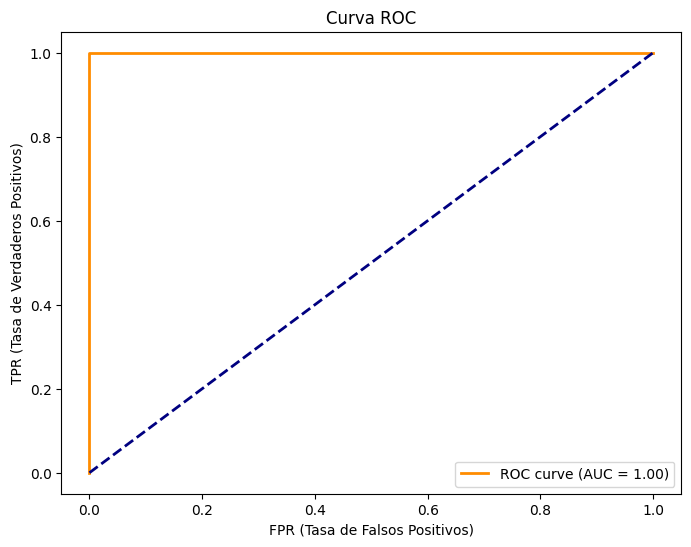

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Etiquetas reales (0 = negativo, 1 = positivo)
y_true = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

# Probabilidades predichas por el modelo (valores entre 0 y 1)
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])

# Calcular las tasas de verdaderos positivos (TPR) y falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Imprimir los umbrales utilizados
print("Umbrales utilizados:", thresholds)

# Calcular el AUC (Área bajo la curva)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FPR (Tasa de Falsos Positivos)')
plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()